In [34]:
import numpy as np

In [35]:
if __name__ == '__main__':
    N=int(input('please input Simpson node n:')) 
    a=float(input('please input the left value of interval:'))
    b=float(input('please input the right value of interval:'))

please input Simpson node n:31
please input the left value of interval:0
please input the right value of interval:5


In [36]:
def simps(a,b,N):
    if N % 2 != 1:
        raise ValueError("N must be an odd integer.")
    dx = (b-a)/(N-1)
    A=np.zeros(N)
    for i in range(0,N):
        if i==0:
            A[0]=dx/3
        elif i==N-1:
            A[N-1]=dx/3
        elif i % 2 ==1:
            A[i]=(4/3)*dx
        else:
            A[i]=(2/3)*dx
    return A, dx

In [37]:
A =simps(a,b,N)[0] #coefficent 
dx= simps(a,b,N)[1] #dx

In [38]:
x=np.zeros(N)
for i in range(0,N):
    x[i]=a+dx*(i)

In [39]:
x, A

(array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
        1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
        2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
        3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ,
        4.16666667, 4.33333333, 4.5       , 4.66666667, 4.83333333,
        5.        ]),
 array([0.05555556, 0.22222222, 0.11111111, 0.22222222, 0.11111111,
        0.22222222, 0.11111111, 0.22222222, 0.11111111, 0.22222222,
        0.11111111, 0.22222222, 0.11111111, 0.22222222, 0.11111111,
        0.22222222, 0.11111111, 0.22222222, 0.11111111, 0.22222222,
        0.11111111, 0.22222222, 0.11111111, 0.22222222, 0.11111111,
        0.22222222, 0.11111111, 0.22222222, 0.11111111, 0.22222222,
        0.05555556]))

In [40]:
k=np.zeros((N, N))
for i in range (1,N+1):
    for j in range (1,N+1):
        k[i-1,j-1]=np.sin(x[i-1])*np.cos(x[j-1])
print ("the values of kernel function is :\n",k)

the values of kernel function is :
 [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.          0.
   0.        ]
 [ 0.16589613  0.16359735  0.1567647   0.14558755  0.13037566  0.11155059
   0.08963406  0.06523346  0.039025    0.01173503 -0.01588017 -0.04305527
  -0.06903715 -0.09310577 -0.1145941  -0.13290663 -0.14753584 -0.15807631
  -0.16423593 -0.16584399 -0.16285592 -0.15535454 -0.14354774 -0.12776272
  -0.10843695 -0.086106   -0.06138876 -0.03497021 -0.00758251  0.02001532
   0.04705846]
 [ 0.3271947   0.32266084  0.3091849   0.28714036  0.25713814  0.22000972
   0.17678405  0.12865907  0.07696849  0.02314484 -0.03132024 -0.08491732
  -0.13616104 -0.18363125 -0.2260124  -0.26212994 -0.29098294 -0.31177176
  -0.3239202

In [41]:
f=np.zeros(N)
for i in range(1,N+1):
    f[i-1]=np.sin(x[i-1])
print ("the values of function f is : \n",f)

the values of function f is : 
 [ 0.          0.16589613  0.3271947   0.47942554  0.6183698   0.74017685
  0.84147098  0.91944498  0.9719379   0.99749499  0.99540796  0.96573465
  0.90929743  0.82766035  0.72308588  0.59847214  0.45727263  0.30340047
  0.14112001 -0.02507139 -0.19056796 -0.35078323 -0.50127705 -0.63787871
 -0.7568025  -0.85475261 -0.9290145  -0.97753012 -0.99895492 -0.99269514
 -0.95892427]


In [42]:
def solve_LSAE(lamda): 
    B=np.zeros((N,N))#Store coefficient matrix
    for i in range(1,N+1):
        for j in range(1,N+1):
            if i == j:
                B[i-1,j-1]=1-lamda*A[j-1]*k[i-1,j-1]
            else:
                B[i-1,j-1]=-lamda*A[j-1]*k[i-1,j-1]
    rhs=np.array(f,dtype='float')
    C=np.linalg.solve(B,rhs) #solve C
    return C 

In [43]:
ya=np.zeros(N)
ya=solve_LSAE(1)
ya

array([ 0.        ,  0.30710123,  0.60569159,  0.8874961 ,  1.14470496,
        1.37018999,  1.55770221,  1.70204499,  1.79921809,  1.84652849,
        1.84266505,  1.78773485,  1.68326019,  1.53213644,  1.33855177,
        1.10787109,  0.84648739,  0.56164453,  0.26123652, -0.04641129,
       -0.35277287, -0.64935787, -0.92794687, -1.18081918, -1.40096681,
       -1.58228869, -1.71975976, -1.80957021, -1.84923106, -1.83764318,
       -1.77512771])

In [44]:
y=np.zeros(N)
for i in range(1,N+1):
    temp=0
    for j in range(1,N+1):
            temp=1*A[j-1]*k[i-1,j-1]*ya[j-1]
            temp+=temp
    y[i-1]=f[i-1]+temp
y

array([ 0.        ,  0.15661449,  0.30888864,  0.45260239,  0.58377293,
        0.69876506,  0.79439194,  0.8680034 ,  0.91755942,  0.94168663,
        0.93971636,  0.91170324,  0.85842359,  0.78135399,  0.6826303 ,
        0.56498852,  0.4316889 ,  0.28642566,  0.13322455, -0.02366868,
       -0.17990597, -0.33115743, -0.47323134, -0.60219035, -0.71446052,
       -0.80693047, -0.87703752, -0.92283876, -0.94306488, -0.93715533,
       -0.90527389])

In [45]:
yy=np.zeros(N)
for i in range(1,N+1):
    yy[i-1]=2*np.sin(x[i-1])
yy


array([ 0.        ,  0.33179227,  0.65438939,  0.95885108,  1.23673961,
        1.48035371,  1.68294197,  1.83888996,  1.9438758 ,  1.99498997,
        1.99081592,  1.93146931,  1.81859485,  1.6553207 ,  1.44617176,
        1.19694429,  0.91454525,  0.60680093,  0.28224002, -0.05014277,
       -0.38113593, -0.70156646, -1.0025541 , -1.27575742, -1.51360499,
       -1.70950521, -1.858029  , -1.95506024, -1.99790983, -1.98539029,
       -1.91784855])

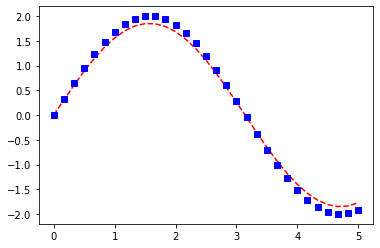

In [46]:
import matplotlib.pyplot as plt
plt.plot(x, ya, 'r--', x, yy, 'bs')
plt.show()